In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf 
import os 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima 

In [2]:
os.getcwd()

'C:\\Users\\jalad\\Downloads\\big data _project'

In [3]:
# loading the dataset
dataframe = pd.read_csv("C:/Users/jalad/Downloads/AAPL.csv")

# Displaing the first few rows of the dataset
print("dataset:")
print(dataframe.head())

dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [4]:
# checking the data types and information about the  dataset
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB
None


In [5]:
# check for duplicates
duplicate_dates = dataframe[dataframe.duplicated(subset='Date')]
print("Duplicate Dates in the dataset:")
print(duplicate_dates)

# Check for missing values
print("\nChecking missing values:")
print(dataframe.isnull().sum())

Duplicate Dates in the dataset:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Checking missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


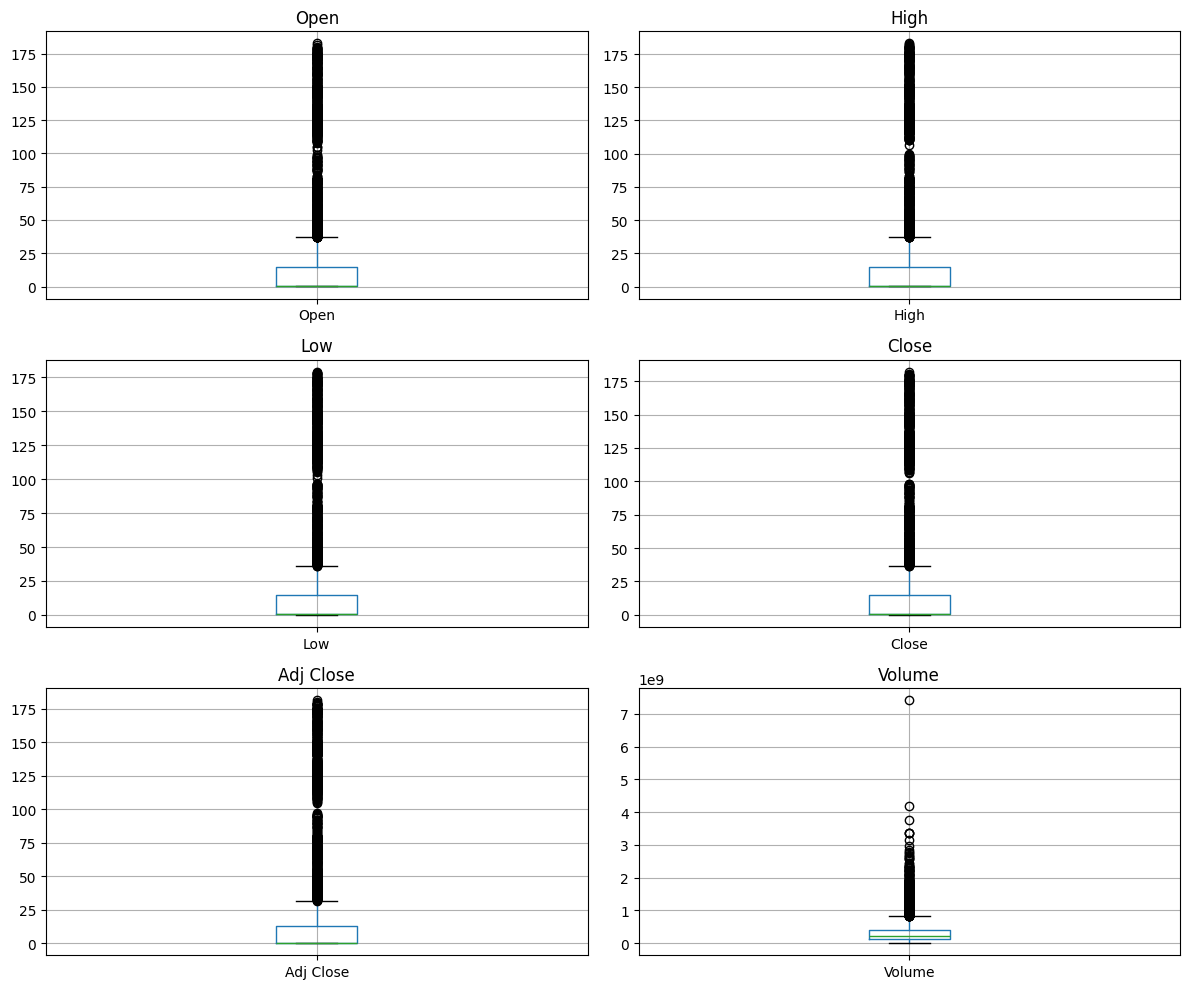

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plotting box plots for each variable
dataframe.boxplot(column='Open', ax=axes[0, 0])
axes[0, 0].set_title('Open')

dataframe.boxplot(column='High', ax=axes[0, 1])
axes[0, 1].set_title('High')

dataframe.boxplot(column='Low', ax=axes[1, 0])
axes[1, 0].set_title('Low')

dataframe.boxplot(column='Close', ax=axes[1, 1])
axes[1, 1].set_title('Close')

dataframe.boxplot(column='Adj Close', ax=axes[2, 0])
axes[2, 0].set_title('Adj Close')

dataframe.boxplot(column='Volume', ax=axes[2, 1])
axes[2, 1].set_title('Volume')

plt.tight_layout()
plt.show()


In [7]:

# converting 'Date' column to datetime format and set it as index
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

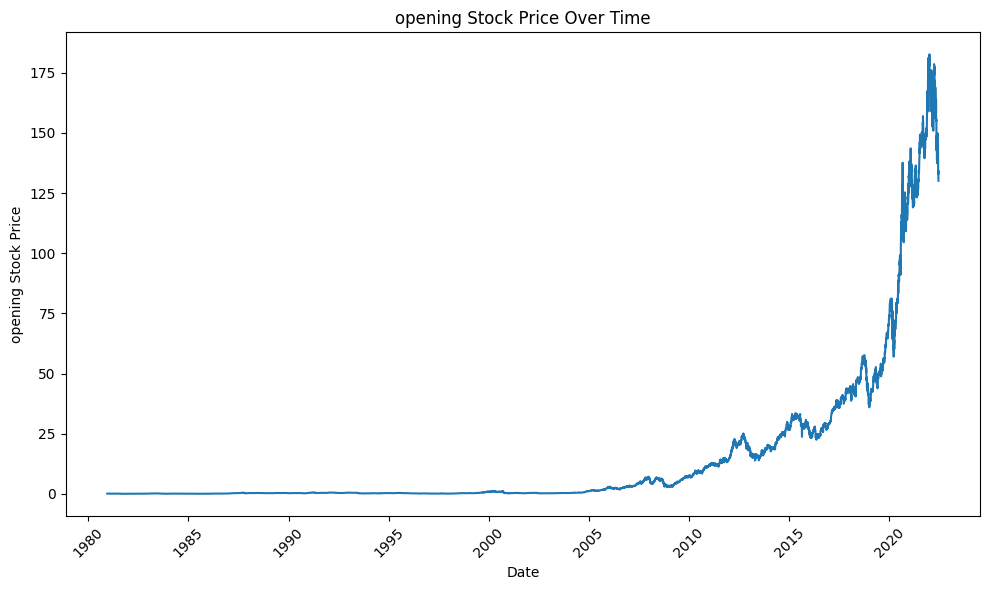

In [8]:
#Exploratory Data Analysis 
# Line chart of opening stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=dataframe.index, y='Open', data=dataframe)
plt.title('opening Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('opening Stock Price')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

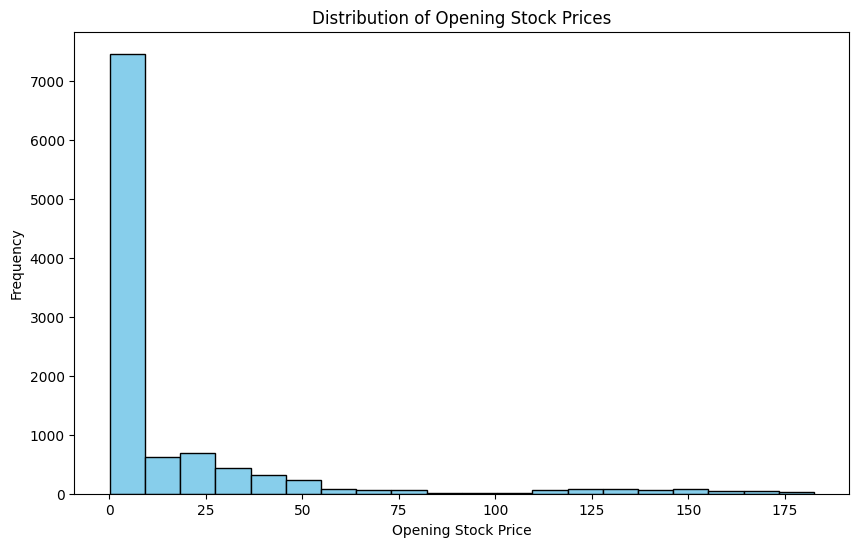

In [9]:
#distribution of opening stock prices
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Open'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Opening Stock Prices')
plt.xlabel('Opening Stock Price')
plt.ylabel('Frequency')
plt.show()

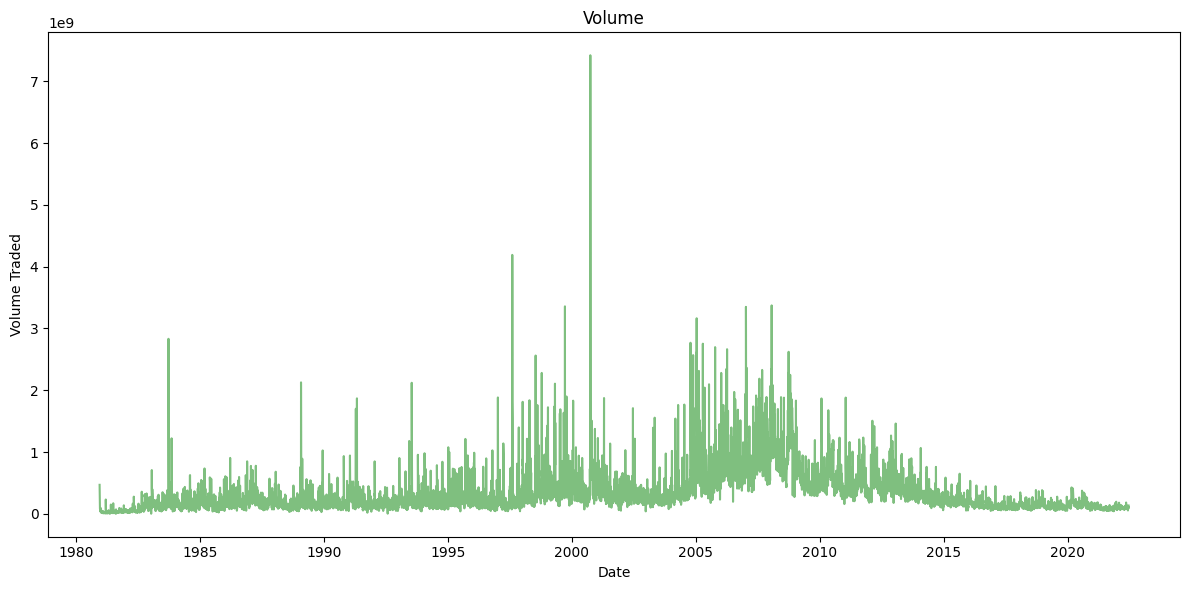

In [10]:
# Plotting volume traded
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=dataframe, color='g', alpha=0.5)
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.tight_layout()
plt.show()

In [11]:
dataframe.drop(["High","Low","Close","Adj Close","Volume"],axis=1,inplace=True) # dropping the columns

In [12]:
dataframe

,Open
Date,
1980-12-12,0.128348
1980-12-15,0.122210
1980-12-16,0.113281
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-06-13,132.869995
2022-06-14,133.130005
2022-06-15,134.289993


In [13]:
df=dataframe.reset_index()
df

,Date,Open
0,1980-12-12,0.128348
1,1980-12-15,0.122210
2,1980-12-16,0.113281
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10463,2022-06-13,132.869995
10464,2022-06-14,133.130005
10465,2022-06-15,134.289993
10466,2022-06-16,132.080002


In [14]:
import pandas as pd
# Splitting the data into train and test sets
train_data = df[df['Date'].dt.year <= 2020]
test_data = df[df['Date'].dt.year > 2020]
# Checking the shapes of the train and test sets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (10100, 2)
Test data shape: (368, 2)


In [15]:
train_data.set_index("Date")
test_data.set_index("Date")

,Open
Date,
2021-01-04,133.520004
2021-01-05,128.889999
2021-01-06,127.720001
2021-01-07,128.360001
2021-01-08,132.429993
...,...
2022-06-13,132.869995
2022-06-14,133.130005
2022-06-15,134.289993


In [16]:
train_data

,Date,Open
0,1980-12-12,0.128348
1,1980-12-15,0.122210
2,1980-12-16,0.113281
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10095,2020-12-24,131.320007
10096,2020-12-28,133.990005
10097,2020-12-29,138.050003
10098,2020-12-30,135.580002


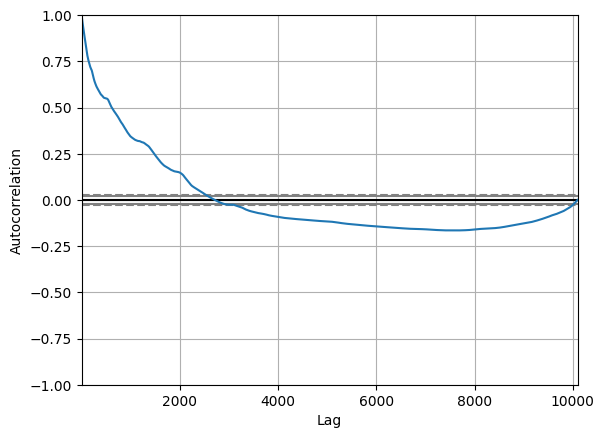

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train_data['Open'])
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima 

class YourClassName:  

    def adfuller_test(self, data):
        result = adfuller(data)
        return result[1]
    
    def class1(self, test):  
        hh = self.adfuller_test(test)
        if hh < 0.05:
            print("Data is stationary.")
            stepwise = auto_arima(test, trace=True, suppress_warnings=True, max_p=8, max_d=8, max_q=8, max_order=8)
            return stepwise
        else:
            print("Data is non-stationary.")
            data_diff = test - test.shift(1)
            hh_diff = self.adfuller_test(data_diff.dropna())
            if hh_diff < 0.05:
                print("Data after differencing is stationary.")
                stepwise = auto_arima(test, trace=True, suppress_warnings=True, max_p=8, max_d=8, max_q=8, max_order=8)
                return stepwise
your_object = YourClassName()
result = your_object.class1(train_data['Open'])


Data is non-stationary.
Data after differencing is stationary.
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=22320.594, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=19583.170, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=17987.616, Time=0.16 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=17049.239, Time=0.29 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=16390.358, Time=0.28 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=15957.817, Time=0.47 sec
 ARIMA(6,2,0)(0,0,0)[0]             : AIC=15771.053, Time=0.54 sec
 ARIMA(7,2,0)(0,0,0)[0]             : AIC=15599.432, Time=0.65 sec
 ARIMA(8,2,0)(0,0,0)[0]             : AIC=15375.127, Time=0.76 sec
 ARIMA(8,2,1)(0,0,0)[0]             : AIC=inf, Time=3.15 sec
 ARIMA(7,2,1)(0,0,0)[0]             : AIC=inf, Time=4.54 sec
 ARIMA(8,2,0)(0,0,0)[0] intercept   : AIC=15377

In [19]:
order=result.order
order

(8, 2, 0)

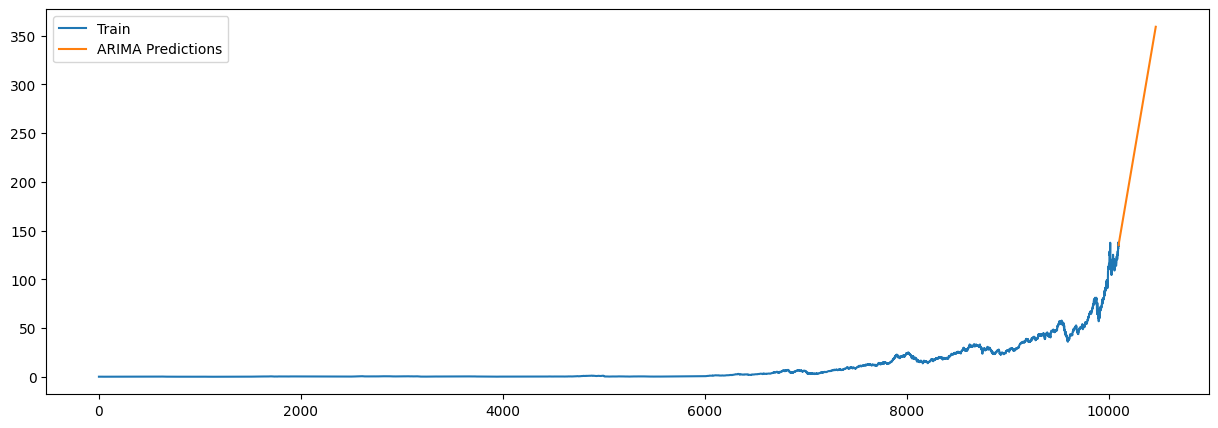

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(train_data['Open'], order=order) # ARIMA(p,d,q) order
model_fit = model.fit(cov_type="opg")
# feature predictions for test data  
predictions = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(15,5))
plt.plot(train_data['Open'], label='Train')
plt.plot(predictions, label='ARIMA Predictions')
plt.legend(loc='best')
plt.show()


In [21]:
predictions # ARIMA prediction values for Arima model 

10100    135.092977
10101    136.026387
10102    137.657583
10103    138.164294
10104    138.454833
            ...    
10463    356.787568
10464    357.395652
10465    358.003736
10466    358.611821
10467    359.219905
Name: predicted_mean, Length: 368, dtype: float64

In [22]:
test_data # comparing to test_ data  and Arima above prediction values  

,Date,Open
10100,2021-01-04,133.520004
10101,2021-01-05,128.889999
10102,2021-01-06,127.720001
10103,2021-01-07,128.360001
10104,2021-01-08,132.429993
...,...,...
10463,2022-06-13,132.869995
10464,2022-06-14,133.130005
10465,2022-06-15,134.289993
10466,2022-06-16,132.080002


In [23]:
import pandas as pd
# Concatenating predictions and test_data side by side to display the prediction open price
comparison_df = pd.concat([predictions.head(10), test_data.head(10)], axis=1)
print(comparison_df)


       predicted_mean       Date        Open
10100      135.092977 2021-01-04  133.520004
10101      136.026387 2021-01-05  128.889999
10102      137.657583 2021-01-06  127.720001
10103      138.164294 2021-01-07  128.360001
10104      138.454833 2021-01-08  132.429993
10105      139.280544 2021-01-11  129.190002
10106      140.020926 2021-01-12  128.500000
10107      140.134036 2021-01-13  128.759995
10108      140.638703 2021-01-14  130.800003
10109      141.443553 2021-01-15  128.779999


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculating Mean Squared Error 
mse = mean_squared_error(test_data['Open'], predictions)
print("Mean Squared Error (MSE):", mse)

# Calculating Root Mean Squared Error 
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating R-squared
r_squared = r2_score(test_data['Open'], predictions)
print("R-squared:", r_squared)

# Calculating Adjusted R-squared
n = len(test_data)
p = 1  
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r_squared)


Mean Squared Error (MSE): 12928.807357941556
Root Mean Squared Error (RMSE): 113.70491351714558
R-squared: -44.70619253462678
Adjusted R-squared: -44.831072842098436


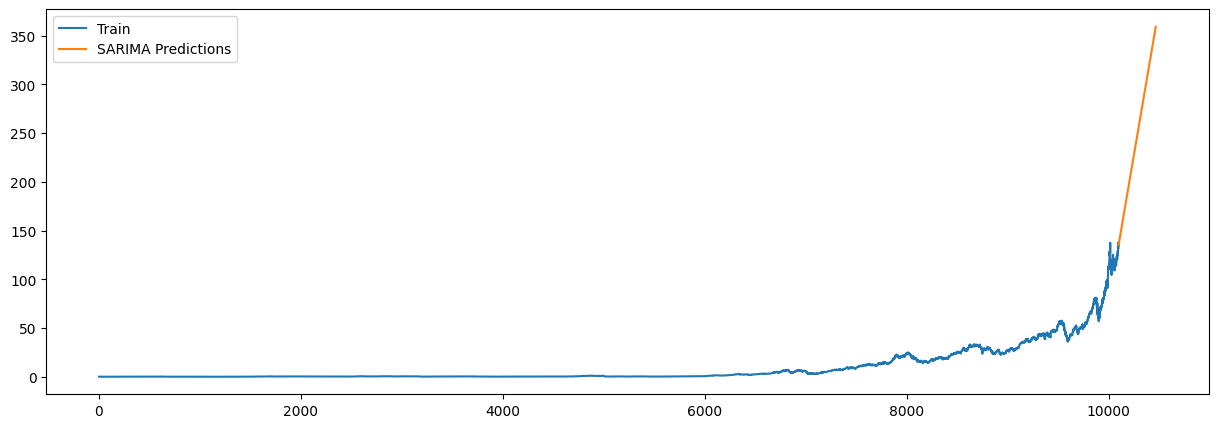

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
model = SARIMAX(train_data['Open'], order=order)
model_fit = model.fit()
predictions1 = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(15,5))
plt.plot(train_data['Open'], label='Train')
plt.plot(predictions1, label='SARIMA Predictions')
plt.legend(loc='best')
plt.show()

In [26]:
predictions1# sarimax prediction values 

10100    135.092977
10101    136.026387
10102    137.657583
10103    138.164294
10104    138.454833
            ...    
10463    356.787568
10464    357.395652
10465    358.003736
10466    358.611821
10467    359.219905
Name: predicted_mean, Length: 368, dtype: float64

In [27]:
test_data

,Date,Open
10100,2021-01-04,133.520004
10101,2021-01-05,128.889999
10102,2021-01-06,127.720001
10103,2021-01-07,128.360001
10104,2021-01-08,132.429993
...,...,...
10463,2022-06-13,132.869995
10464,2022-06-14,133.130005
10465,2022-06-15,134.289993
10466,2022-06-16,132.080002


In [28]:
import pandas as pd
comparison_df1 = pd.concat([predictions1.head(10), test_data.head(10)], axis=1)
print(comparison_df1)

       predicted_mean       Date        Open
10100      135.092977 2021-01-04  133.520004
10101      136.026387 2021-01-05  128.889999
10102      137.657583 2021-01-06  127.720001
10103      138.164294 2021-01-07  128.360001
10104      138.454833 2021-01-08  132.429993
10105      139.280544 2021-01-11  129.190002
10106      140.020926 2021-01-12  128.500000
10107      140.134036 2021-01-13  128.759995
10108      140.638703 2021-01-14  130.800003
10109      141.443553 2021-01-15  128.779999


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(test_data['Open'], predictions1)
print("Mean Squared Error (MSE):", mse)

# Calculating Root Mean Squared Error 
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating R-squared
r_squared = r2_score(test_data['Open'], predictions1)
print("R-squared:", r_squared)

# Calculating Adjusted R-squared
n = len(test_data)
p = 1  
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r_squared)


Mean Squared Error (MSE): 12928.807357941556
Root Mean Squared Error (RMSE): 113.70491351714558
R-squared: -44.70619253462678
Adjusted R-squared: -44.831072842098436




Epoch 1/50

10099/10099 - 10s - loss: 3.3931e-04 - 10s/epoch - 980us/step
Epoch 2/50
10099/10099 - 9s - loss: 2.0763e-05 - 9s/epoch - 856us/step
Epoch 3/50
10099/10099 - 9s - loss: 2.0260e-05 - 9s/epoch - 847us/step
Epoch 4/50
10099/10099 - 9s - loss: 1.9058e-05 - 9s/epoch - 855us/step
Epoch 5/50
10099/10099 - 9s - loss: 1.7398e-05 - 9s/epoch - 857us/step
Epoch 6/50
10099/10099 - 9s - loss: 1.9081e-05 - 9s/epoch - 848us/step
Epoch 7/50
10099/10099 - 9s - loss: 1.7860e-05 - 9s/epoch - 865us/step
Epoch 8/50
10099/10099 - 9s - loss: 1.8523e-05 - 9s/epoch - 884us/step
Epoch 9/50
10099/10099 - 9s - loss: 1.7557e-05 - 9s/epoch - 861us/step
Epoch 10/50
10099/10099 - 9s - loss: 1.9148e-05 - 9s/epoch - 867us/step
Epoch 11/50
10099/10099 - 9s - loss: 1.7182e-05 - 9s/epoch - 873us/step
Epoch 12/50
10099/10099 - 9s - loss: 1.9023e-05 - 9s/epoch - 871us/step
Epoch 13/50
10099/10099 - 9s - loss: 1.6551e-05 - 9s/epoch - 867us/step
Epoch 14/50
10099/10099 - 9s - loss: 1.8169e-05 - 9s/epoch - 881us/s

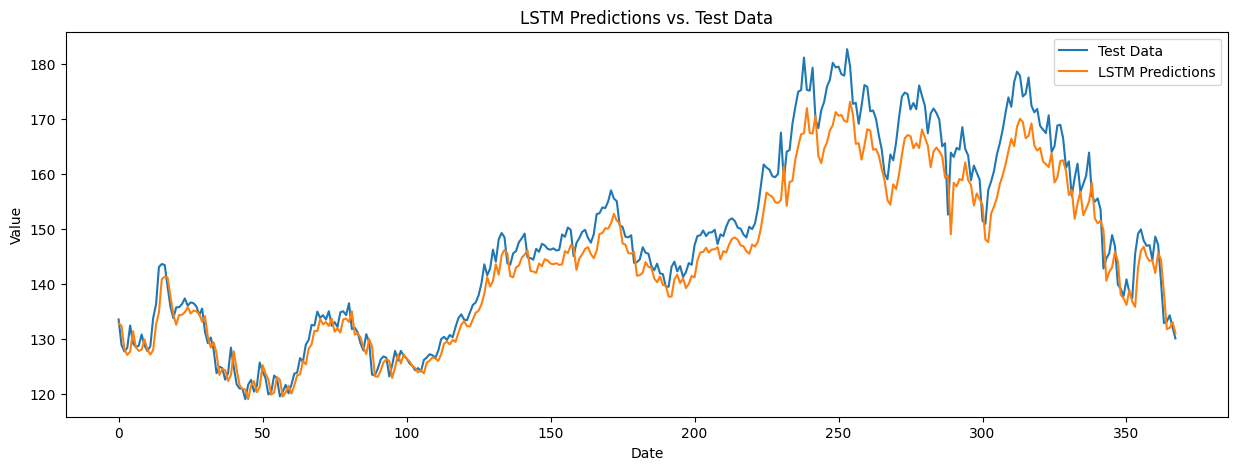

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# train and test data for scaling
combined_data = pd.concat([train_data['Open'], test_data['Open']], axis=0)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(combined_data.values.reshape(-1, 1))

# time steps
time_steps = 1

# Creating dataset for training
X_train, y_train = [], []
for i in range(len(train_data) - time_steps):
    X_train.append(scaled_data[i:(i + time_steps), 0])
    y_train.append(scaled_data[i + time_steps, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

# Building and training LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Creating dataset for testing
inputs = scaled_data[len(train_data) - time_steps:]
inputs = inputs.reshape(-1, 1)
X_test, y_test = [], []
for i in range(len(inputs) - time_steps):
    X_test.append(inputs[i:(i + time_steps), 0])
    y_test.append(inputs[i + time_steps, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Making predictions
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Calculating MSE
mse_lstm = mean_squared_error(test_data['Open'].values, predictions_lstm)
print("Mean Squared Error for LSTM:", mse_lstm)

# Plot results
plt.figure(figsize=(15, 5))
plt.plot(test_data['Open'].values, label='Test Data')
plt.plot(predictions_lstm, label='LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Predictions vs. Test Data')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(test_data['Open'], predictions_lstm)
print("Mean Squared Error (MSE):", mse)

# Calculating Root Mean Squared Error 
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating R-squared
r_squared = r2_score(test_data['Open'], predictions_lstm)
print("R-squared:", r_squared)

# Calculating Adjusted R-squared
n = len(test_data)
p = 1  
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r_squared)


Mean Squared Error (MSE): 23.17403527973031
Root Mean Squared Error (RMSE): 4.813941761148582
R-squared: 0.9180746615696944
Adjusted R-squared: 0.9178508218472072


In [32]:
test_data

,Date,Open
10100,2021-01-04,133.520004
10101,2021-01-05,128.889999
10102,2021-01-06,127.720001
10103,2021-01-07,128.360001
10104,2021-01-08,132.429993
...,...,...
10463,2022-06-13,132.869995
10464,2022-06-14,133.130005
10465,2022-06-15,134.289993
10466,2022-06-16,132.080002


In [33]:
predictions_lstm

array([[132.85971 ],
       [132.35588 ],
       [128.15833 ],
       [127.08862 ],
       [127.67422 ],
       [131.37282 ],
       [128.43202 ],
       [127.802155],
       [128.03964 ],
       [129.89682 ],
       [128.05789 ],
       [127.14356 ],
       [127.94833 ],
       [132.60791 ],
       [134.83069 ],
       [140.82935 ],
       [141.29211 ],
       [141.14377 ],
       [137.70918 ],
       [134.42859 ],
       [132.5629  ],
       [134.33919 ],
       [134.366   ],
       [134.84856 ],
       [135.78453 ],
       [134.60738 ],
       [135.1341  ],
       [135.0092  ],
       [134.4912  ],
       [133.10231 ],
       [134.12445 ],
       [130.30502 ],
       [128.44112 ],
       [129.3881  ],
       [127.354095],
       [123.44205 ],
       [124.53284 ],
       [124.292786],
       [122.357025],
       [123.43278 ],
       [127.7199  ],
       [124.41283 ],
       [121.57596 ],
       [120.858444],
       [120.81179 ],
       [119.03484 ],
       [121.52011 ],
       [122.3